# Battery Cars Workbook


In [17]:
# For Inhwa's Macbook
# import os
# os.chdir('/Users/inhwamo/Documents/fuel_consumption/')


In [18]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#directory according to github repo
battery = pd.read_csv('data/consumption_clean/battery.csv')
battery.head()

,year,make,model,class,motor,transmission,fuel,city(kWh/100km),hwy(kWh/100km),comb(kWh/100km),city(Le/100km),hwy(Le/100km),comb(Le/100km),range,co2_emissions,co2_rating,smog_rating,recharge_time
0,2023,Audi,e-tron 55 quattro,SUV: Standard,300.0,A1,B,26.8,26.5,26.6,3.0,3.0,3.0,364.0,0.0,10.0,10.0,10.0
1,2023,Audi,e-tron Sportback 55 quattro,SUV: Standard,300.0,A1,B,27.3,26.2,26.8,3.1,2.9,3.0,362.0,0.0,10.0,10.0,10.0
2,2023,Audi,e-tron GT,Mid-size,390.0,A2,B,25.9,25.3,25.6,2.9,2.8,2.9,383.0,0.0,10.0,10.0,10.5
3,2023,Audi,RS e-tron GT,Mid-size,475.0,A2,B,26.4,25.5,26.0,3.0,2.9,2.9,373.0,0.0,10.0,10.0,10.5
4,2023,Audi,Q4 50 e-tron quattro,SUV: Small,220.0,A1,B,21.5,24.0,22.6,2.4,2.7,2.5,380.0,0.0,10.0,10.0,9.0


In [2]:
# Only keeping relevant columns
filtered_battery_cars = battery[['make', 'model', 'class', 'motor', 'range', 'recharge_time']]

# Removed, as sample size = 1, and for some reason it causes errors
filtered_battery_cars = filtered_battery_cars[filtered_battery_cars['make'] != 'Fisker']

# Commented out, as price is not needed and price data is a PITA to merge

# # Calculating efficiency score
# filtered_battery_cars['efficiency_score'] = filtered_battery_cars['range'] / filtered_battery_cars['recharge_time']

# # Sorting by efficiency and taking top 25
# top_cars_efficiency = filtered_battery_cars.sort_values(by='efficiency_score', ascending=False).head(25)

# # Manually inputting prices (ideally this would be merged/joined from another dataframe)
# top_cars_efficiency['price'] = [49000, 63000, 'unknown', 'unknown','unknown','unknown',
#                      'unknown','unknown','unknown','unknown','unknown','unknown','unknown',
#                      'unknown','unknown','unknown','unknown','unknown','unknown','unknown',
#                      'unknown','unknown','unknown','unknown','unknown']

# #Lucid price data is missing
# top_cars_range = filtered_battery_cars.sort_values(by='range', ascending=False).head(25)
# top_cars_range['price'] = ['unknown', 'unknown', 'unknown', 'unknown','unknown','unknown',
#                      'unknown','unknown','unknown','unknown','unknown','unknown','unknown',
#                      'unknown','unknown','unknown','unknown','unknown','unknown','unknown',
#                      'unknown','unknown','unknown','unknown','unknown']

# top_cars_recharge = filtered_battery_cars.sort_values(by='recharge_time', ascending=True).head(25)
# top_cars_recharge['price'] = [49000, 63000, 'unknown', 'unknown','unknown','unknown',
#                      'unknown','unknown','unknown','unknown','unknown','unknown','unknown',
#                      'unknown','unknown','unknown','unknown','unknown','unknown','unknown',
#                      'unknown','unknown','unknown','unknown','unknown']

# Counting unique makes
num_makes = filtered_battery_cars['make'].nunique()
print(f"There are {num_makes} unique makes in the dataset.")


There are 23 unique makes in the dataset.


## All battery cars

/var/folders/vn/z092srkj237125336k_n8tq40000gn/T/ipykernel_6657/1969901513.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=battery, x='range', y='recharge_time', palette='husl')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


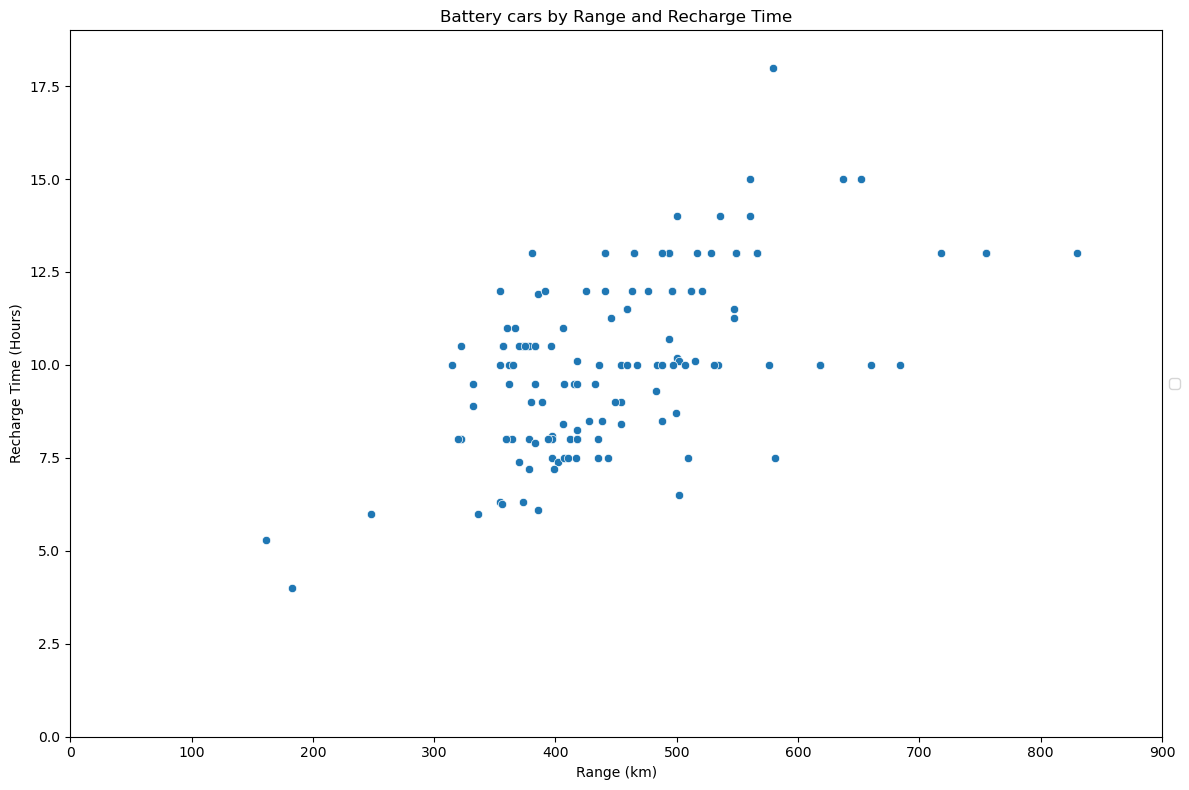

In [3]:
# Plot for all battery cars
plt.figure(figsize=(12, 8))
sns.scatterplot(data=battery, x='range', y='recharge_time', palette='husl')

# Set axis limits. Same axis limits for all plots
plt.xlim(0, 900)
plt.ylim(0, 19)
plt.title('Battery cars by Range and Recharge Time')
plt.xlabel('Range (km)')
plt.ylabel('Recharge Time (Hours)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('battery_all.png', dpi=300)
plt.tight_layout()
plt.show()


## Cars by make

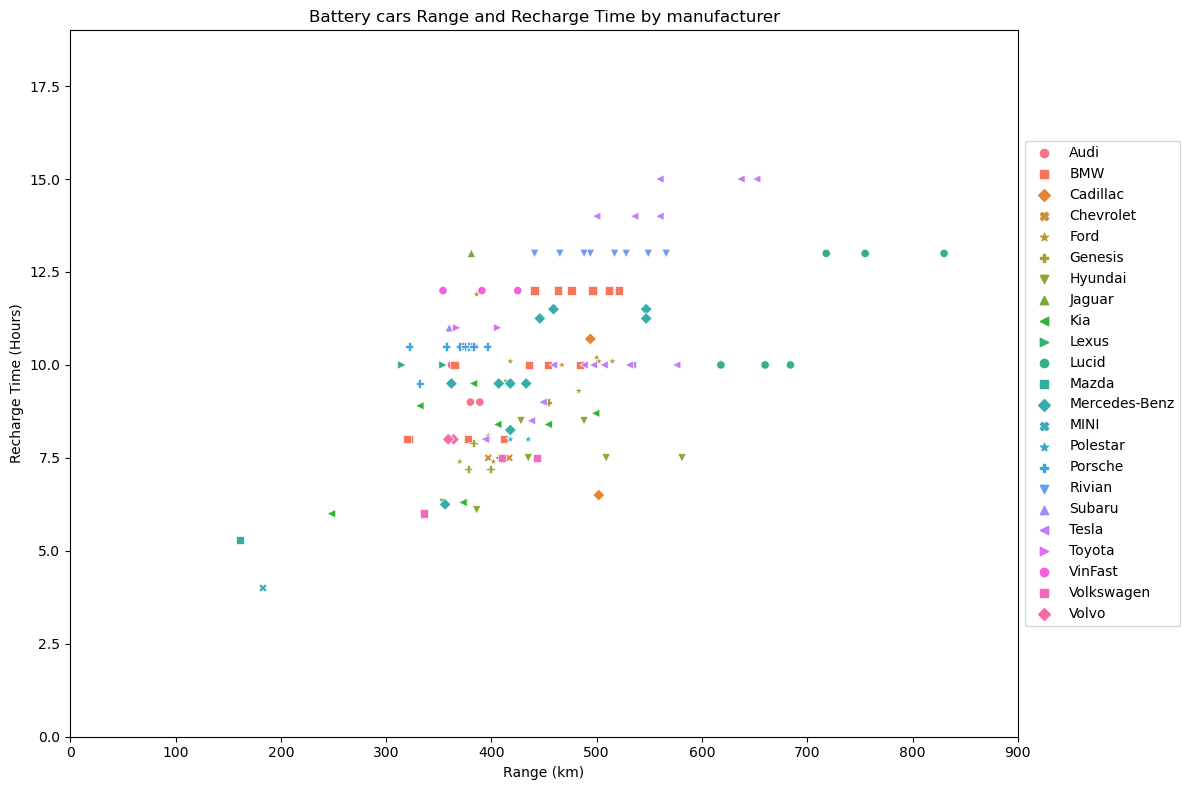

In [4]:
# Plot all cars by make

# Setting markers for each make
# https://matplotlib.org/stable/api/markers_api.html
all_makes = pd.concat([filtered_battery_cars['make'], filtered_battery_cars['make']]).unique()
available_markers_all = ['o', 's', 'D', 'X', '*', 'P', 'v', '^', '<', '>']
repeated_markers_all = available_markers_all * (len(all_makes) // len(available_markers_all) + 1)
markers_dict_all = dict(zip(all_makes, repeated_markers_all))

plt.figure(figsize=(12, 8))
plt.xlim(0, 900)
plt.ylim(0, 19)

sns.scatterplot(data=filtered_battery_cars, x='range', y='recharge_time', 
                hue='make', style='make', palette='husl', 
                hue_order=all_makes, style_order=all_makes, markers=markers_dict_all)

plt.title('Battery cars Range and Recharge Time by manufacturer')
plt.xlabel('Range (km)')
plt.ylabel('Recharge Time (Hours)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.tight_layout()
plt.savefig("all_car_plot.jpg")
plt.show()


## Manufacturers by range and recharge_time avgs

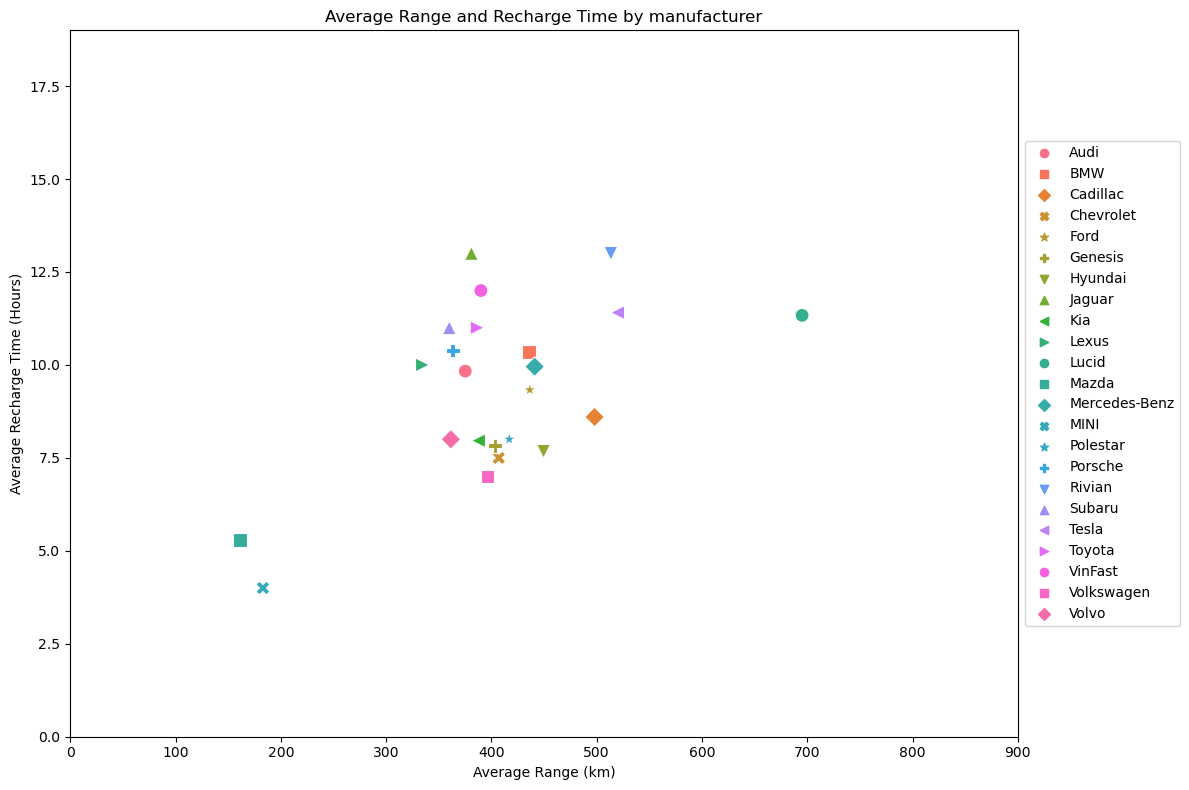

In [5]:
# Plot car averages by manufacturer

# Group by 'make' and calculate mean for 'range' and 'recharge_time'
averages = filtered_battery_cars.groupby('make')[['range', 'recharge_time']].mean().reset_index()

plt.figure(figsize=(12, 8))

# same markers as before 
sns.scatterplot(data=averages, x='range', y='recharge_time', 
                hue='make', style='make', palette='husl', 
                markers=markers_dict_all, s=100, 
                hue_order=all_makes, style_order=all_makes)

plt.xlim(0, 900)
plt.ylim(0, 19)
plt.title('Average Range and Recharge Time by manufacturer')
plt.xlabel('Average Range (km)')
plt.ylabel('Average Recharge Time (Hours)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.tight_layout()
plt.savefig("average_car_plot.jpg")
plt.show()


## Range over recharge time

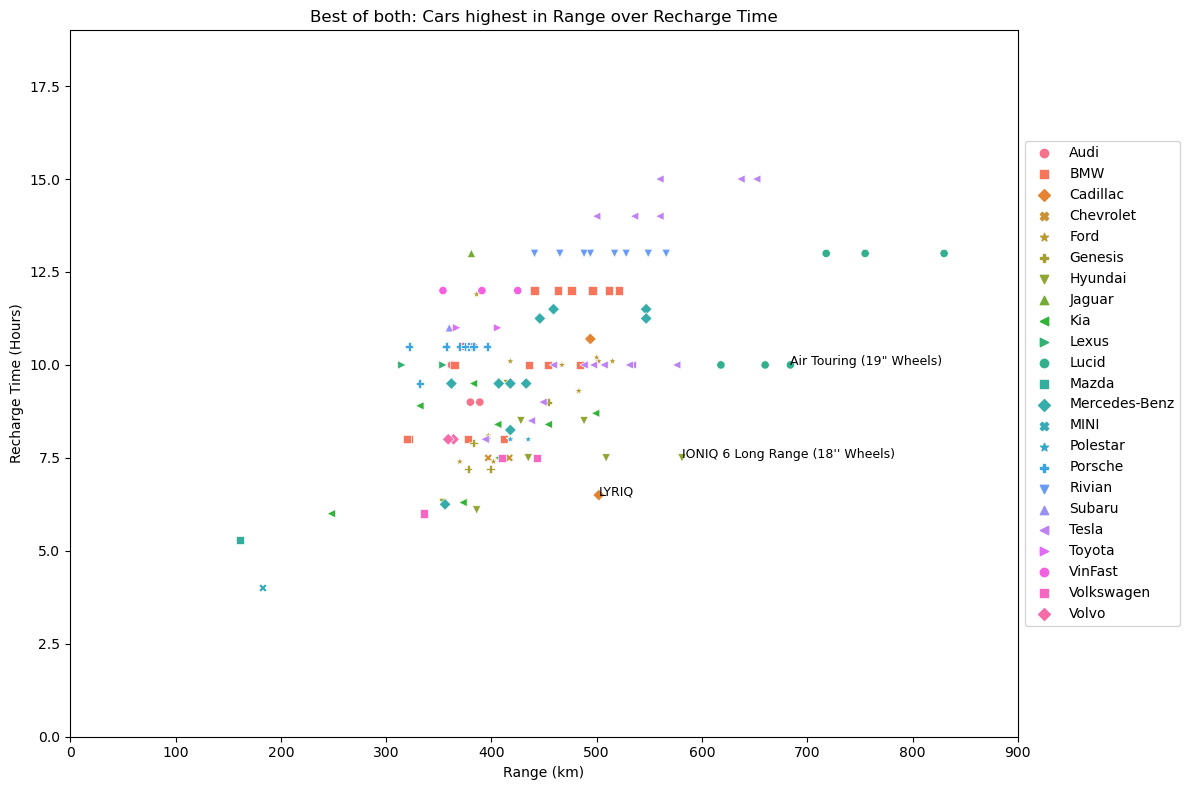

In [6]:
# Selecting few cars with relatively high range and low recharge time
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_battery_cars, x='range', y='recharge_time', hue='make', 
                style='make', palette='husl', markers=markers_dict_all,
                hue_order=all_makes, style_order=all_makes)

plt.xlim(0, 900)
plt.ylim(0, 19)
plt.title('Best of both: Cars highest in Range over Recharge Time')
plt.xlabel('Range (km)')
plt.ylabel('Recharge Time (Hours)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Annotate names and prices of the top 3 cars by efficiency
filtered_battery_cars['efficiency_score'] = filtered_battery_cars['range'] / filtered_battery_cars['recharge_time']

cars_to_annotate = filtered_battery_cars.sort_values(by='efficiency_score', ascending=False).head(3)

for x, y, model in zip(cars_to_annotate['range'], cars_to_annotate['recharge_time'], cars_to_annotate['model']):
    plt.annotate(model, (x, y), fontsize=9)
    # if isinstance(price, int):  # Checking if price exists. Lucid is missing price data.
    #     label = f"{model} - ${price:,}"
    # else:
    #     label = f"{model} - {price}"
plt.tight_layout()
plt.savefig("top_car_plot.jpg")
plt.show()


## Best cars

In [7]:
print('Top 10 cars in terms of range (km):')
print(filtered_battery_cars.sort_values(by='range', ascending=False).head(10))

print('Top 10 cars in terms of recharge time (hours):')
print(filtered_battery_cars.sort_values(by='recharge_time', ascending=True).head(10))

# print('Top 10 cars in terms of efficiency (range/recharge time):')
# print(top_cars_efficiency.head(10))

Top 10 cars in terms of range (km):
      make                                       model      class  motor  \
62   Lucid           Air Grand Touring XR (19" Wheels)  Full-size  611.0   
64   Lucid           Air Grand Touring XR (21" Wheels)  Full-size  611.0   
63   Lucid           Air Grand Touring XR (20" Wheels)  Full-size  611.0   
65   Lucid  Air Grand Touring Performance (21" Wheels)  Full-size  783.0   
68   Lucid                    Air Touring (19" Wheels)  Full-size  462.0   
66   Lucid                       Air Pure (19" Wheels)  Full-size  358.0   
122  Tesla                                     Model S  Full-size  494.0   
123  Tesla                  Model S Plaid (19" Wheels)  Full-size  750.0   
67   Lucid                       Air Pure (20" Wheels)  Full-size  358.0   
69   Lucid                    Air Touring (20" Wheels)  Full-size  462.0   

     range  recharge_time  efficiency_score  
62   830.0           13.0         63.846154  
64   755.0           13.0         5

In [8]:
# top 10 cars in terms of range
top_cars_range = filtered_battery_cars.sort_values(by='range', ascending=False).head(10).reset_index(drop=True)
top_cars_range.index += 1 # ranking from 1 to 10
top_cars_range.to_csv('top_cars_range.csv', index=True, index_label="Rank")
print(top_cars_range)


# top 10 cars in terms of charging time
top_cars_fastcharge = filtered_battery_cars.sort_values(by='recharge_time', ascending=True).head(10).reset_index(drop=True)
top_cars_fastcharge.index += 1
top_cars_fastcharge.to_csv('top_cars_fastcharge.csv', index=True, index_label="Rank")
print(top_cars_fastcharge)


     make                                       model      class  motor  \
1   Lucid           Air Grand Touring XR (19" Wheels)  Full-size  611.0   
2   Lucid           Air Grand Touring XR (21" Wheels)  Full-size  611.0   
3   Lucid           Air Grand Touring XR (20" Wheels)  Full-size  611.0   
4   Lucid  Air Grand Touring Performance (21" Wheels)  Full-size  783.0   
5   Lucid                    Air Touring (19" Wheels)  Full-size  462.0   
6   Lucid                       Air Pure (19" Wheels)  Full-size  358.0   
7   Tesla                                     Model S  Full-size  494.0   
8   Tesla                  Model S Plaid (19" Wheels)  Full-size  750.0   
9   Lucid                       Air Pure (20" Wheels)  Full-size  358.0   
10  Lucid                    Air Touring (20" Wheels)  Full-size  462.0   

    range  recharge_time  efficiency_score  
1   830.0           13.0         63.846154  
2   755.0           13.0         58.076923  
3   755.0           13.0         58.076

## Best car manufacturers

In [9]:
print('Top 10 car manufacturers in terms of average range (km):')
print(averages.sort_values(by='range', ascending=False).head(10))

print('Top 10 car manufacturers in terms of average recharge time (hours):')
print(averages.sort_values(by='recharge_time', ascending=True).head(10))

# print('Top 10 car manufacturers in terms of average efficiency (range/recharge time):')
# print(averages.sort_values(by='efficiency_score', ascending=False).head(10))

Top 10 car manufacturers in terms of average range (km):
             make       range  recharge_time
10          Lucid  695.111111      11.333333
18          Tesla  519.875000      11.406250
16         Rivian  513.450000      13.000000
2        Cadillac  498.000000       8.600000
6         Hyundai  449.500000       7.675000
13  Mercedes-Benz  441.090909       9.954545
4            Ford  436.363636       9.327273
1             BMW  435.882353      10.352941
14       Polestar  417.000000       8.000000
3       Chevrolet  407.000000       7.500000
Top 10 car manufacturers in terms of average recharge time (hours):
          make       range  recharge_time
11        MINI  183.000000         4.0000
12       Mazda  161.000000         5.3000
21  Volkswagen  396.333333         7.0000
3    Chevrolet  407.000000         7.5000
6      Hyundai  449.500000         7.6750
5      Genesis  403.500000         7.8250
8          Kia  387.750000         7.9625
14    Polestar  417.000000         8.0000
22

In [10]:
top_range = averages.sort_values(by='range', ascending=False).head(10).reset_index(drop=True)
top_range.index = top_range.index + 1
print('Top 10 car manufacturers in terms of average range (km):')
print(top_range)

top_range.to_csv('top_range.csv', index=True, index_label="Rank")


Top 10 car manufacturers in terms of average range (km):
             make       range  recharge_time
1           Lucid  695.111111      11.333333
2           Tesla  519.875000      11.406250
3          Rivian  513.450000      13.000000
4        Cadillac  498.000000       8.600000
5         Hyundai  449.500000       7.675000
6   Mercedes-Benz  441.090909       9.954545
7            Ford  436.363636       9.327273
8             BMW  435.882353      10.352941
9        Polestar  417.000000       8.000000
10      Chevrolet  407.000000       7.500000


In [11]:
top_recharge_time = averages.sort_values(by='recharge_time', ascending=True).head(10).reset_index(drop=True)
top_recharge_time.index = top_recharge_time.index + 1

top_recharge_time.to_csv('top_recharge_time.csv', index=True, index_label="Rank")

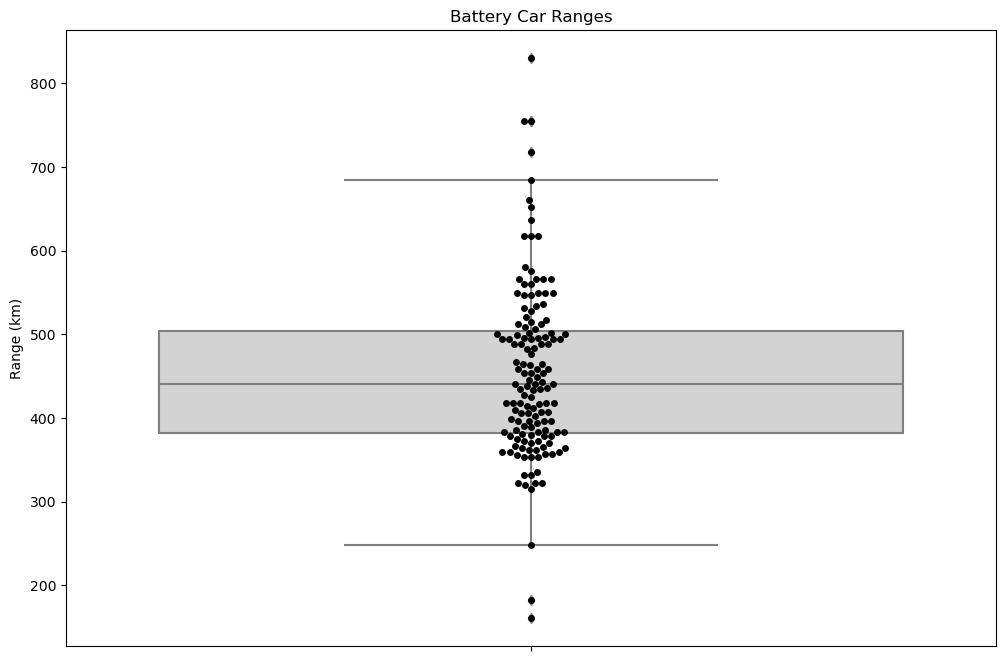

In [12]:

plt.figure(figsize=(12, 8))

sns.boxplot(data=filtered_battery_cars, y='range', color='lightgray')
sns.swarmplot(data=filtered_battery_cars, y='range', color='black')

plt.title("Battery Car Ranges")
plt.ylabel("Range (km)")
plt.savefig("ranges.jpg")

plt.show()

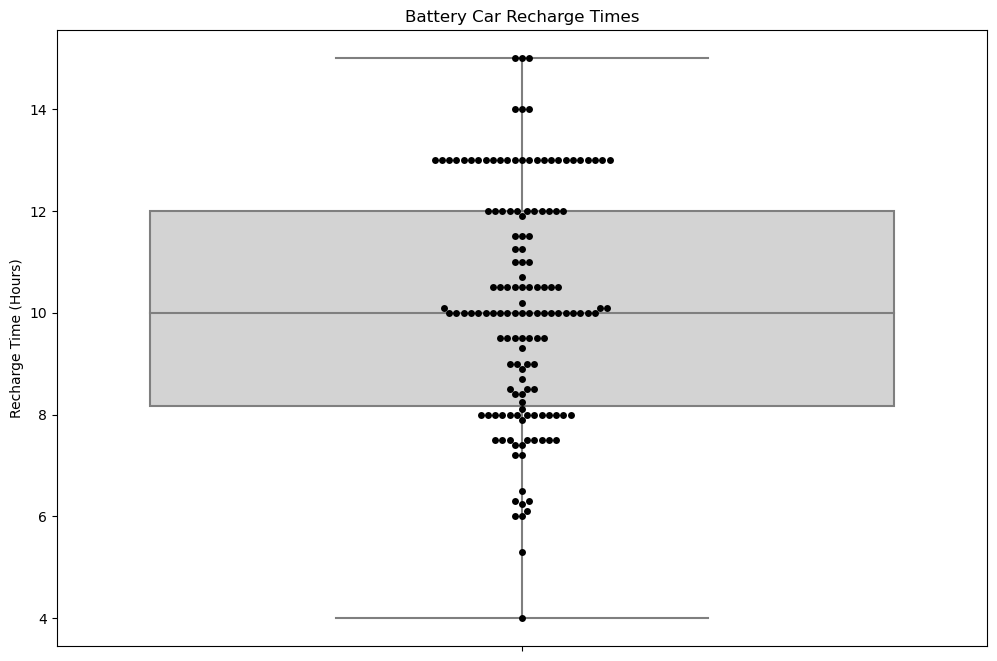

In [13]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=filtered_battery_cars, y='recharge_time', color='lightgray')
sns.swarmplot(data=filtered_battery_cars, y='recharge_time', color='black')

plt.title("Battery Car Recharge Times")
plt.ylabel("Recharge Time (Hours)")
plt.savefig("times.jpg")

plt.show()


In [14]:
average_range = filtered_battery_cars['range'].mean()
average_recharge_time = filtered_battery_cars['recharge_time'].mean()

print(f"The average range for all battery cars is {average_range} km.")
print(f"The average recharge time for all battery cars is {average_recharge_time} hours.")


The average range for all battery cars is 453.32167832167835 km.
The average recharge time for all battery cars is 10.167832167832168 hours.
